DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000014250F123D0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000014250F123D0> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh


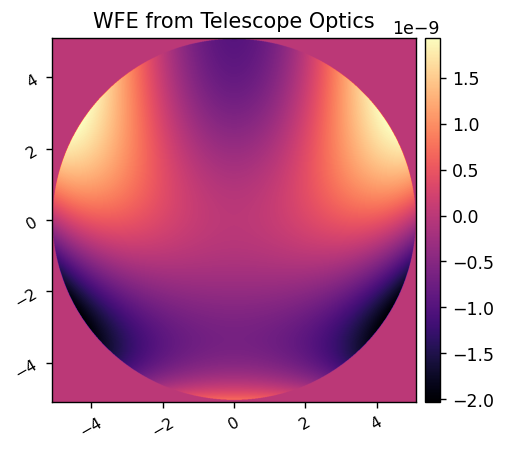

In [4]:
import numpy as np
import cupy as cp
import poppy
xp = cp if poppy.accel_math._USE_CUPY else np

from poppy.poppy_core import PlaneType

import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import astropy.units as u
from astropy.io import fits
from pathlib import Path
from IPython.display import clear_output, display

from importlib import reload

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.DEBUG)

poppy_log.disabled = True

import warnings
warnings.filterwarnings("ignore")

from prop_models import full, compact, agpm
reload(full)
reload(compact)
reload(agpm)

from wfsc_1dm import efc, pwp, utils

import misc_funs as misc

pupil_diam = 10.2*u.mm
wavelength_c = 750e-9*u.m

vortex = agpm.IdealAGPM(name='VVC', wavelength=wavelength_c, charge=6)

lyot_stop_physical = poppy.CircularAperture(name='Lyot Stop', radius=3*u.mm)
lyot_stop_compact = poppy.CircularAperture(name='Lyot Stop', radius=3*u.mm * 500/350)

hdr = fits.getheader('wfe_on_axis.fits')
ote_wfe = poppy.FITSOpticalElement(opd='wfe_on_axis.fits', opdunits='meters',
                                   pixelscale=pupil_diam.to_value(u.m)/hdr['NAXIS1'])
misc.imshow1(ote_wfe.opd, 'WFE from Telescope Optics', pxscl=ote_wfe.pixelscale.to(u.mm/u.pix))



In [2]:
1420/2

710.0

In [18]:
poppy_log.disabled = True

m1_diam = 6.5*u.m
m2_diam = 700*u.mm
m3_diam = 800*u.mm
m4_diam = 100*u.mm

fl_m1 = 3.652962023674745E+004/2
fl_m2 = 3.636649801410836E+003/2
fl_m3 = 3.463978665836946E+003/2

m1 = poppy.QuadraticLens(fl_m1, name='M1')
m2 = poppy.QuadraticLens(fl_m2, name='M2')
m3 = poppy.QuadraticLens(fl_m3, name='M3')
m4 = poppy.ScalarTransmission()

seeds = (1,2,3,4)

m1surf = poppy.StatisticalPSDWFE('M1 Surface OPD', index=3.0, wfe=20*u.nm, radius=m1_diam/2, seed=seeds[0])
m2surf = poppy.StatisticalPSDWFE('M2 Surface OPD', index=3.0, wfe=20*u.nm, radius=m2_diam/2, seed=seeds[1])
m3surf = poppy.StatisticalPSDWFE('M3 Surface OPD', index=3.0, wfe=20*u.nm, radius=m3_diam/2, seed=seeds[2])
m4surf = poppy.StatisticalPSDWFE('M4 Surface OPD', index=3.0, wfe=20*u.nm, radius=m4_diam/2, seed=seeds[3])

npix = 512
oversample = 4
pupil_diam = m1_diam

PUPIL = poppy.CircularAperture(radius=pupil_diam/2)

poppy_log.disabled = False

fosys = poppy.FresnelOpticalSystem(pupil_diameter=pupil_diam, npix=npix, beam_ratio=1/oversample)
fosys.add_optic(PUPIL)
fosys.add_optic(m1)
fosys.add_optic(m1surf)
fosys.add_optic(m2, distance=1.663812910134875E+004*u.mm)
fosys.add_optic(m2surf)
fosys.add_optic(m3, distance=(16500+2000)*u.mm)
fosys.add_optic(m3surf)
fosys.add_optic(m4, distance=1.895000000000000E+003*u.mm)
fosys.add_optic(m4surf)
fosys.add_optic(poppy.ScalarTransmission('Image'), distance=2.091997751264193E+003*u.mm)

_, wfs = fosys.calc_psf(wavelength=1*u.um, return_intermediates=True)

INFO:poppy:Initialized OpticalSystem: unnamed system
INFO:poppy:Added optic: Circle, radius=3.25 m after separation: 0.00e+00 m 
INFO:poppy:Added optic: M1 after separation: 0.00e+00 m 
INFO:poppy:Added optic: M1 Surface OPD after separation: 0.00e+00 m 
INFO:poppy:Added optic: M2 after separation: 1.66e+04 mm 
INFO:poppy:Added optic: M2 Surface OPD after separation: 0.00e+00 m 
INFO:poppy:Added optic: M3 after separation: 1.85e+04 mm 
INFO:poppy:Added optic: M3 Surface OPD after separation: 0.00e+00 m 
INFO:poppy:Added optic: -empty- after separation: 1.90e+03 mm 
INFO:poppy:Added optic: M4 Surface OPD after separation: 0.00e+00 m 
INFO:poppy:Added optic: Image after separation: 2.09e+03 mm 
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy:User requested saving intermediate wavefronts in call to poppy.calc_psf
DEBUG:poppy:Already loaded wisdom prior to this calculation, not reloading.
INFO:poppy: Propagating wavelength = 1 um
DEBUG:poppy:Padded WF array for oversampling by 4.0

DEBUG:poppy:Spherical to Waist propagation, dz=841.0640680005991 m
DEBUG:poppy:using cupy (GPU) FFT of (2048, 2048) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.000000 s, full function  in 0.001 s
DEBUG:poppy:Applying spherical phase curvature =8.41e+02 m
DEBUG:poppy:Applying spherical lens phase =1.19e-03 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:  Intermediate Pixelscale: 32.74445747178296 um / pix
DEBUG:poppy:Waist to Spherical propagation, dz=-839.1690680005992 m
DEBUG:poppy:Applying spherical phase curvature =-8.39e+02 m
DEBUG:poppy:Applying spherical lens phase =-1.19e-03 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:using cupy (GPU) FFT of (2048, 2048) array, FFT_direction=forward
DEBUG:poppy:    FFT_2D: FFT in 0.001001 s, full function  in 0.001 s
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 3.70e+01 m ----

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000142FF500220>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000142FF500220> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000142FFDBECA0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000142FFDBECA0> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh


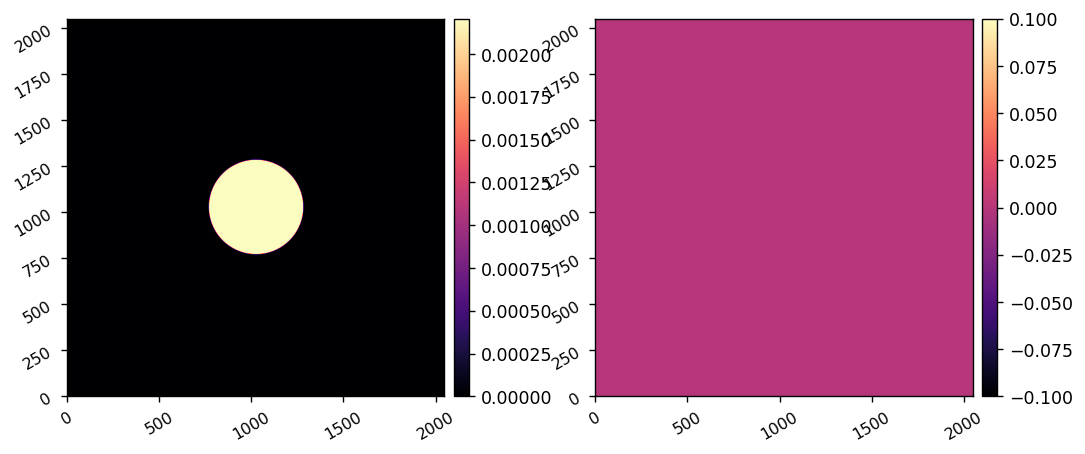

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001428B7B2250>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001428B7B2250> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000142FF5FE8B0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000142FF5FE8B0> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh


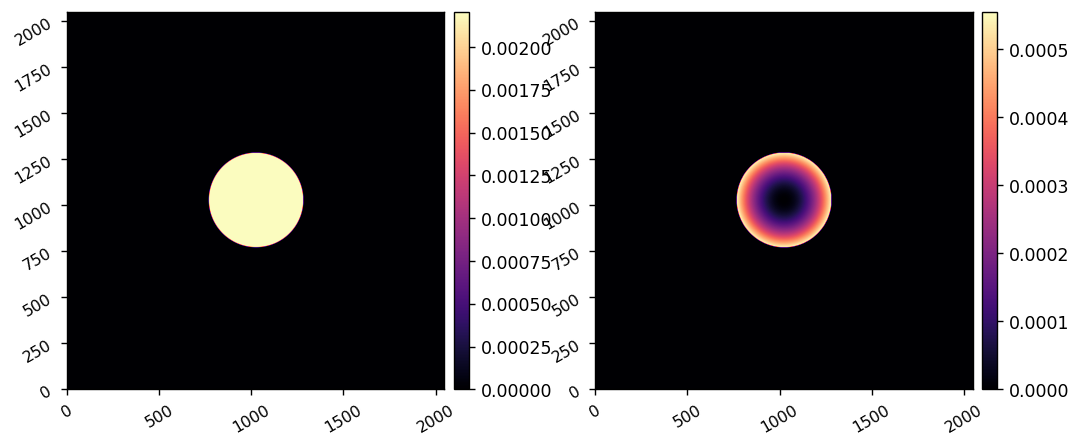

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000014286E4E850>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000014286E4E850> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000142FF3DB370>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000142FF3DB370> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh


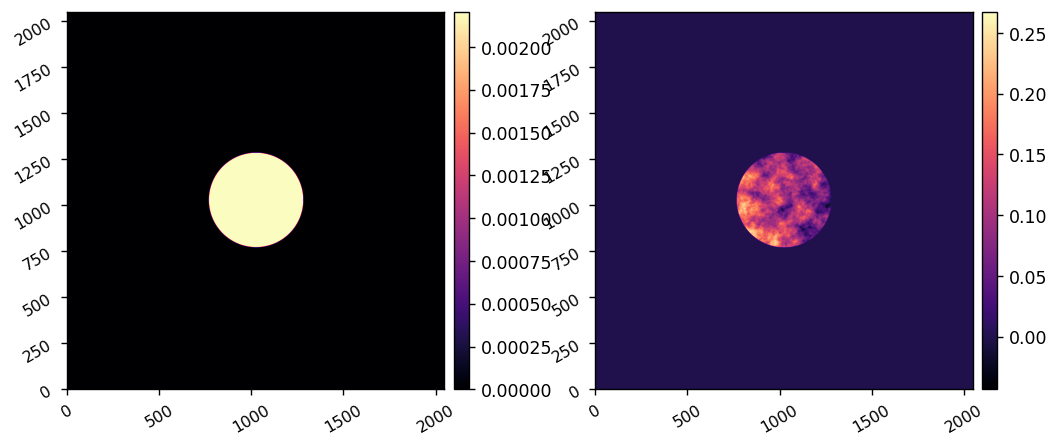

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000142FF557EE0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000142FF557EE0> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000142FF6CF3A0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000142FF6CF3A0> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh


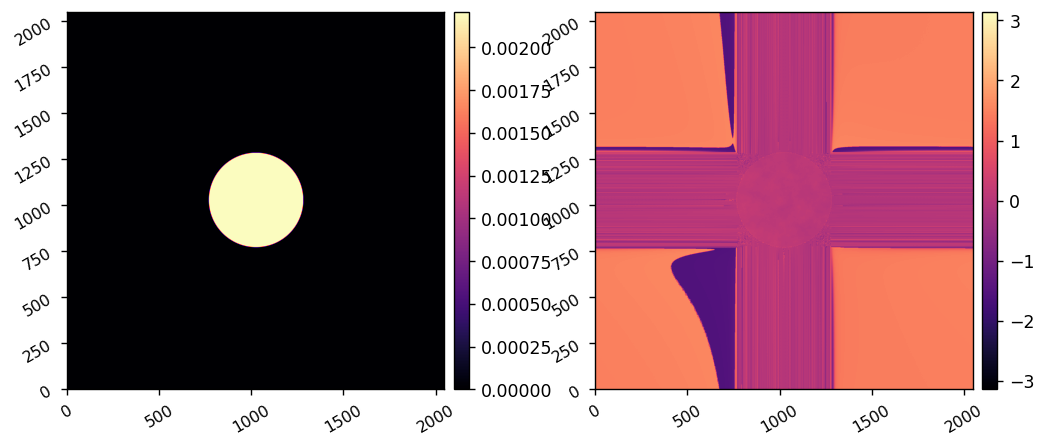

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000014286ED2D60>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000014286ED2D60> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000142FF8ECE20>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000142FF8ECE20> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh


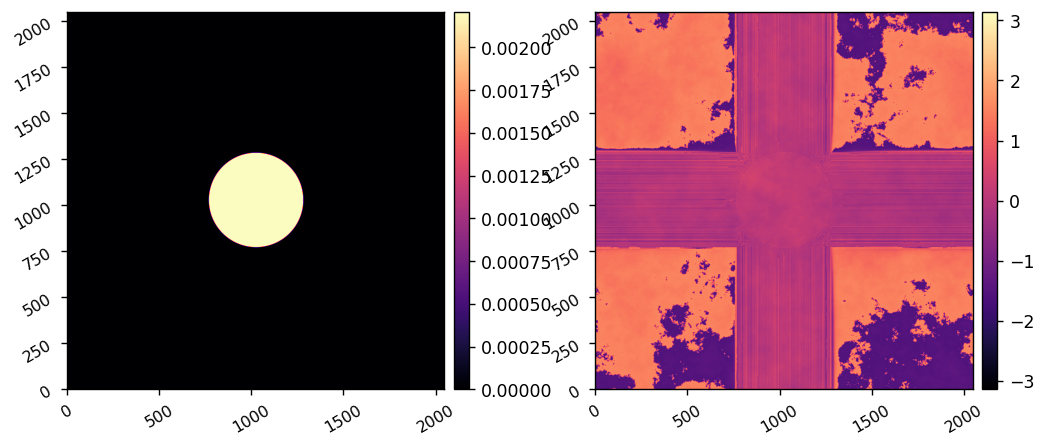

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000142FFA12370>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000142FFA12370> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001428B1FDB50>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001428B1FDB50> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh


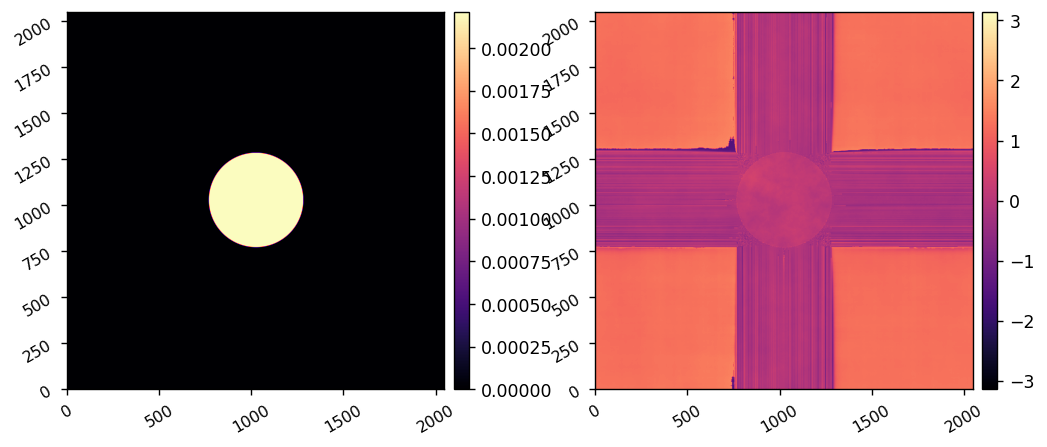

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000142FF921DC0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000142FF921DC0> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000142FF3B4850>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000142FF3B4850> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh


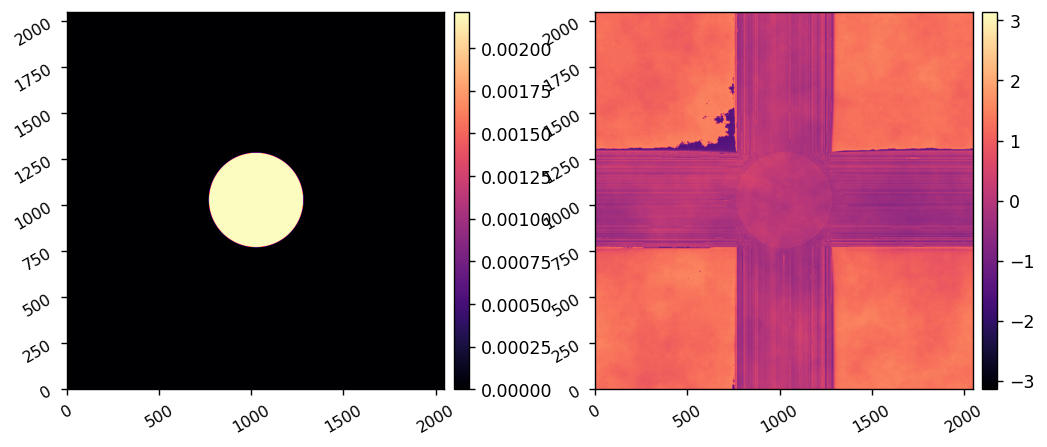

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000142FFFE0430>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000142FFFE0430> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000142FF9745E0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000142FF9745E0> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh


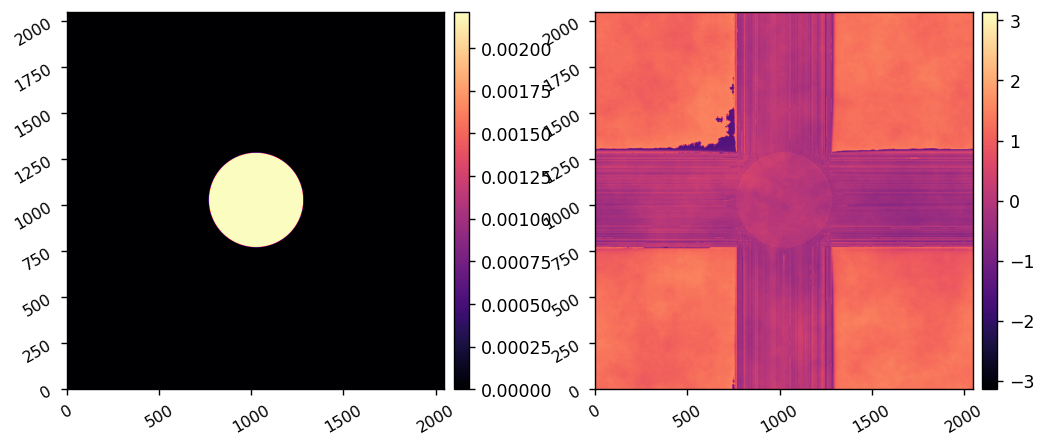

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000142FF5D6F10>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000142FF5D6F10> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000014300917730>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000014300917730> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh


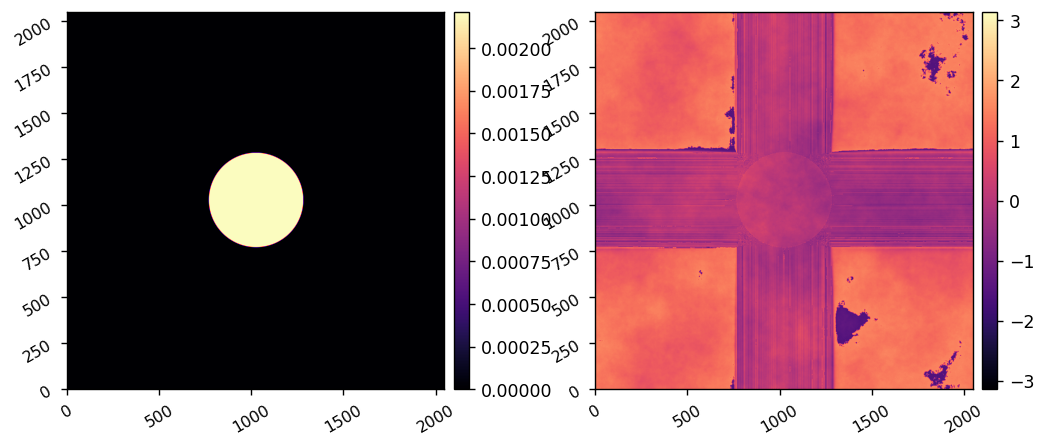

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000143000F3940>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000143000F3940> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000014300754940>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000014300754940> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh


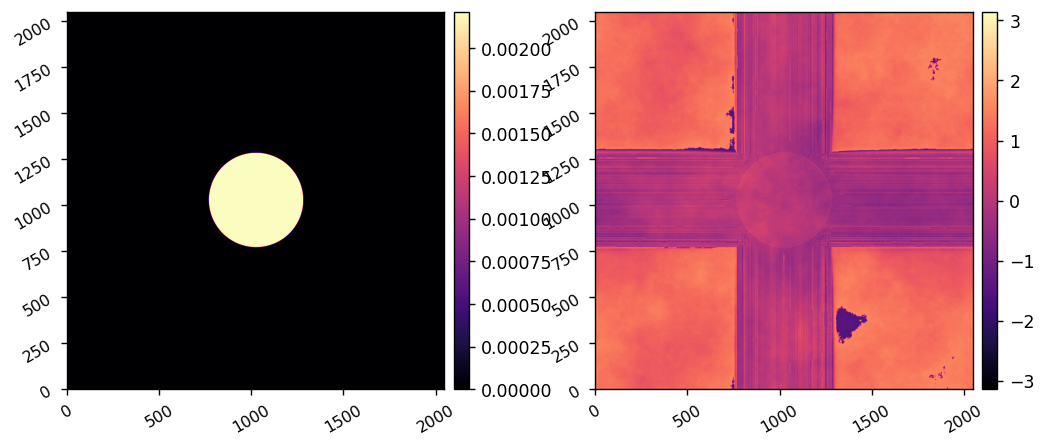

In [17]:
for i in range(len(wfs)):
    misc.imshow2(wfs[i].amplitude, wfs[i].phase)